In [1]:
import tensorflow as tf  
import numpy as np          
import argparse
import pandas as pd
from termcolor import colored


# 1 Read in data

In [2]:
# Blood ROSMAP
ROSMAPFrame = pd.read_csv("../../../Data/ROSMAP_blood_gene_expression_monocyte_ACTL_04172023.csv",header=0, index_col=0)
ROSMAPSampleID = list(ROSMAPFrame.columns.values)
ROSMAPGeneID = list(ROSMAPFrame.index.values)

# Blood ANMerge
ANMergeFrame = pd.read_csv("../../../Data/ANMerge_blood_rna_gene_expr_processed_XH_10112023.csv",header=0, index_col=0)
ANMergeGeneID = list(ANMergeFrame.index.values)
ANMergeSampleID = list(ANMergeFrame.columns.values)

In [3]:
# log transform ROSMAP
ROSMAPFrame = np.log(ROSMAPFrame+1)

# gene overlap between ROSMAP and ANMerge
OverlapGene = list(set(ROSMAPGeneID) & set(ANMergeGeneID))
print("Number of overlapped gene is", colored(len(OverlapGene), 'red'))

Number of overlapped gene is 2785


## 1.1 Aligned dataframe to make their gene aligned

In [4]:
ROSMAPFrame = ROSMAPFrame.loc[OverlapGene,:]
ANMergeFrame = ANMergeFrame.loc[OverlapGene,:]

## 1.2 Read in labels

In [6]:
# read in label
ROSMAP_Info = pd.read_csv("../../../Data/ROSMAP_blood_clinical_monocyte_ACTL_04172023.csv",header=0, index_col=0)

# read in label
ANMerge_Info = pd.read_csv("../../../Data/ANMerge_blood_rna_clinical_processed_XH_10112023.csv",header=0, index_col=0)
    

In [7]:
import collections

ROSMAP_SID = list(ROSMAP_Info.loc[:,'specimenID'])
ROSMAP_Class = list(ROSMAP_Info.loc[:,'Group2'])
Mapping = {'Control': 0, 'Typical.AD': 1, 'Asym.AD': 2, 'LowNFT.AD': 3}
DigitClass = list()
for i in range(len(ROSMAP_SID)):
    tmp = Mapping[ROSMAP_Class[i]]
    DigitClass.append(tmp)


#ANMerge_SID = list(ANMerge_Info.loc[:,'PTID'])
#ANMerge_Class = list(ANMerge_Info.loc[:,'DX'])
ANMerge_SID = list(ANMerge_Info.index.values)
ANMerge_Class = list(ANMerge_Info.loc[:,'Diagnosis'])
Mapping = {'CTL': 0, 'AD': 1, 'MCI': 2}
Mapping_SID_Class = {}
for i in range(len(ANMerge_SID)):
    Mapping_SID_Class[ANMerge_SID[i]] = ANMerge_Class[i]

# used in section 3.1
y_true = np.zeros(len(ANMergeSampleID))
for i in range(len(ANMergeSampleID)):
    y_true[i] = Mapping[Mapping_SID_Class[ANMergeSampleID[i]]]



In [8]:
ANMerge_Info

,Visit,Month,Site,Diagnosis,Sex,Age,APOE,MMSE,Gexp_batch
DCR00001_1,1,0,DCR,AD,Female,80.0,E3E4,21.0,2
DCR00004_1,1,0,DCR,MCI,Male,78.0,E4E4,27.0,2
DCR00009_1,1,0,DCR,CTL,Female,69.0,E3E3,30.0,2
DCR00013_1,1,0,DCR,CTL,Male,82.0,E3E3,30.0,2
DCR00014_1,1,0,DCR,CTL,Female,75.0,E2E3,30.0,2
...,...,...,...,...,...,...,...,...,...
TLSMCI607_1,1,0,Toulouse,MCI,Female,72.0,E3E3,29.0,1
TLSMCI608_1,1,0,Toulouse,MCI,Male,73.0,E3E3,28.0,1
TLSMCI609_1,1,0,Toulouse,MCI,Female,63.0,E3E3,28.0,2
TLSMCI611_1,1,0,Toulouse,MCI,Female,78.0,E3E3,30.0,2


In [9]:
y_true

array([1., 2., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 2., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 2.,
       0., 0., 0., 1., 0., 0., 0., 1., 2., 1., 0., 0., 0., 1., 1., 2., 1.,
       0., 0., 0., 0., 1., 0., 1., 2., 0., 1., 0., 2., 0., 2., 0., 0., 0.,
       0., 0., 2., 1., 0., 0., 0., 2., 0., 0., 0., 2., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 2., 1., 0., 2., 0., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 0., 2., 2., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2.

# 2 Run MMD-MA

In [10]:
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics.pairwise import linear_kernel
import scipy as scip

## 2.1 compute  Gaussian Kernel 

In [11]:
# s is the parameter for the Gaussian kernel
s1 = 20
s2 = 20

# K1 is the Gaussian Kernel for ROSMAP
# XR should be an NxD matrix, where N is number of obs and D its features
XR = ROSMAPFrame.values.T
pairwise_sq_dists = squareform(pdist(XR, 'sqeuclidean'))
K1 = np.exp(-pairwise_sq_dists / s1**2)

# K2 is the Gaussian Kernel for ANMerge
# XR should be an NxD matrix, where N is number of obs and D its features
XA = ANMergeFrame.values.T
pairwise_sq_dists = squareform(pdist(XA, 'sqeuclidean'))
K2 = np.exp(-pairwise_sq_dists / s2**2)

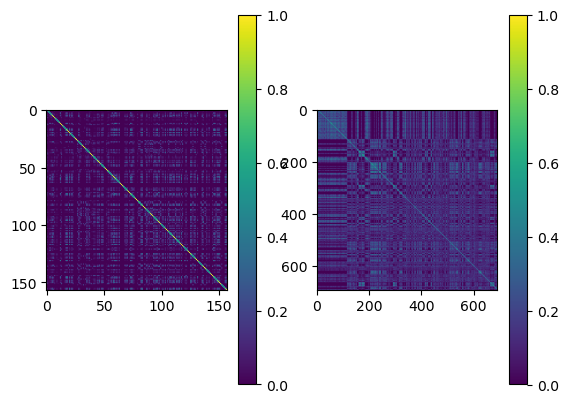

In [12]:
# draw the plot to better choose s1 and s2
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2)
im = ax[0].imshow(K1)
fig.colorbar(im,ax=ax[0])
im2 = ax[1].imshow(K2)
fig.colorbar(im2,ax=ax[1])

## 1.2 MMD-MA

In [13]:
def compute_pairwise_distances(x, y):
    """Computes the squared pairwise Euclidean distances between x and y.
  Args:
    x: a tensor of shape [num_x_samples, num_features]
    y: a tensor of shape [num_y_samples, num_features]
  Returns:
    a distance matrix of dimensions [num_x_samples, num_y_samples].
  Raises:
    ValueError: if the inputs do no matched the specified dimensions.
  """

    if not len(x.get_shape()) == len(y.get_shape()) == 2:
        raise ValueError('Both inputs should be matrices.')

    if x.get_shape().as_list()[1] != y.get_shape().as_list()[1]:
        raise ValueError('The number of features should be the same.')

    norm = lambda x: tf.reduce_sum(tf.square(x), 1)

  # By making the `inner' dimensions of the two matrices equal to 1 using
  # broadcasting then we are essentially substracting every pair of rows
  # of x and y.
  # x will be num_samples x num_features x 1,
  # and y will be 1 x num_features x num_samples (after broadcasting).
  # After the substraction we will get a
  # num_x_samples x num_features x num_y_samples matrix.
  # The resulting dist will be of shape num_y_samples x num_x_samples.
  # and thus we need to transpose it again.
    return tf.transpose(norm(tf.expand_dims(x, 2) - tf.transpose(y)))

def gaussian_kernel_matrix(x, y, sigmas):
    """Computes a Guassian Radial Basis Kernel between the samples of x and y.
  We create a sum of multiple gaussian kernels each having a width sigma_i.
  Args:
    x: a tensor of shape [num_samples, num_features]
    y: a tensor of shape [num_samples, num_features]
    sigmas: a tensor of floats which denote the widths of each of the
      gaussians in the kernel.
  Returns:
    A tensor of shape [num_samples{x}, num_samples{y}] with the RBF kernel.
  """
    beta = 1. / (2. * (tf.expand_dims(sigmas, 1)))
    dist = compute_pairwise_distances(x, y)
    s = tf.matmul(beta, tf.reshape(dist, (1, -1)))

    return tf.reshape(tf.reduce_sum(tf.exp(-s), 0), tf.shape(dist))

def maximum_mean_discrepancy(x, y, kernel=gaussian_kernel_matrix, bandwidth=1.0):
    """Computes the Maximum Mean Discrepancy (MMD) of two samples: x and y.
  Maximum Mean Discrepancy (MMD) is a distance-measure between the samples of
  the distributions of x and y. Here we use the kernel two sample estimate
  using the empirical mean of the two distributions.
  MMD^2(P, Q) = || \E{\phi(x)} - \E{\phi(y)} ||^2
              = \E{ K(x, x) } + \E{ K(y, y) } - 2 \E{ K(x, y) },
  where K = <\phi(x), \phi(y)>,
    is the desired kernel function, in this case a radial basis kernel.
  Args:
      x: a tensor of shape [num_samples, num_features]
      y: a tensor of shape [num_samples, num_features]
      kernel: a function which computes the kernel in MMD. Defaults to the
              GaussianKernelMatrix.
  Returns:
      a scalar denoting the squared maximum mean discrepancy loss.
  """
    with tf.name_scope('MaximumMeanDiscrepancy'):
        # \E{ K(x, x) } + \E{ K(y, y) } - 2 \E{ K(x, y) }
        cost = tf.reduce_mean(kernel(x, x, tf.constant([bandwidth])))
        cost += tf.reduce_mean(kernel(y, y, tf.constant([bandwidth])))
        cost -= 2 * tf.reduce_mean(kernel(x, y, tf.constant([bandwidth])))

        # We do not allow the loss to become negative.
        cost = tf.where(cost > 0, cost, 0, name='value')
    return cost

In [14]:
k1_matrix = K1
k2_matrix = K2
n1 = k1_matrix.shape[0]
n2 = k2_matrix.shape[0]
K1 = tf.constant(k1_matrix, dtype=tf.float32)
K2 = tf.constant(k2_matrix, dtype=tf.float32)

p = 10 # embeded dim 
k = 100 # random seed
training_rate = 0.00005
bandwidth = 1.0
tradeoff2 = 0.01
tradeoff3 = 0.001
I_p=tf.eye(p)

In [15]:
alpha = tf.Variable(tf.random.uniform([n1, p], minval=0.0, maxval=0.1, seed=k))
beta = tf.Variable(tf.random.uniform([n2, p], minval=0.0, maxval=0.1, seed=k))

optimizer = tf.keras.optimizers.Adam(learning_rate=training_rate)
objbest = 1e20
for i in range(10001):
    with tf.GradientTape() as tape:
        mmd_part = maximum_mean_discrepancy(tf.matmul(K1, alpha), tf.matmul(K2, beta), bandwidth=bandwidth)
        penalty_part = tradeoff2 * (tf.norm(tf.subtract(tf.matmul(tf.transpose(alpha), tf.matmul(K1, alpha)), I_p), ord=2) + tf.norm(tf.subtract(tf.matmul(tf.transpose(beta), tf.matmul(K2, beta)), I_p), ord=2))
        distortion_part = tradeoff3 * (tf.norm(tf.subtract(tf.matmul(tf.matmul(K1, alpha), tf.matmul(tf.transpose(alpha), tf.transpose(K1))), K1), ord=2) + tf.norm(tf.subtract(tf.matmul(tf.matmul(K2, beta), tf.matmul(tf.transpose(beta), tf.transpose(K2))), K2), ord=2))
        myFunction = mmd_part + penalty_part + distortion_part

    gradients = tape.gradient(myFunction, [alpha, beta])
    optimizer.apply_gradients(zip(gradients, [alpha, beta]))

    #if i % 100 == 0:
    if objbest > myFunction.numpy():
        objbest = myFunction.numpy()
        alpha_best = alpha.numpy()
        beta_best = beta.numpy()
        besti = i
        rec = '\t'.join([str(k), str(i), str(myFunction.numpy()), str(mmd_part.numpy()), str(penalty_part.numpy()), str(distortion_part.numpy())])
        print(rec)
        #record.write(rec + '\n')

np.savetxt("alpha_hat_" + str(k) + "_" + str(besti) + ".txt", alpha_best)
np.savetxt("beta_hat_" + str(k) + "_" + str(besti) + ".txt", beta_best)

100	0	143.36664	0.83402014	14.7821245	127.750496
100	1	143.08449	0.83458024	14.75279	127.497116
100	2	142.80261	0.8351408	14.723486	127.24398
100	3	142.52106	0.835702	14.694214	126.991135
100	4	142.23978	0.8362638	14.66497	126.73855
100	5	141.9588	0.8368261	14.63576	126.48622
100	6	141.67813	0.83738893	14.606581	126.23415
100	7	141.3978	0.83795214	14.577435	125.98241
100	8	141.11777	0.83851594	14.548323	125.73093
100	9	140.83804	0.83908015	14.519241	125.47972
100	10	140.55867	0.83964485	14.490196	125.22883
100	11	140.2796	0.8402099	14.461185	124.97821
100	12	140.00089	0.8407753	14.432207	124.727905
100	13	139.7225	0.8413411	14.403265	124.47789
100	14	139.44446	0.8419074	14.374359	124.228195
100	15	139.16676	0.8424739	14.3454895	123.9788
100	16	138.88942	0.8430405	14.316655	123.72972
100	17	138.61243	0.8436076	14.287857	123.48096
100	18	138.33578	0.84417504	14.259098	123.23251
100	19	138.05951	0.84474254	14.230374	122.98439
100	20	137.7836	0.84531033	14.201691	122.736595
100	21	137.5080

In [16]:
np.shape(alpha_best)

(157, 10)

In [17]:
np.shape(beta_best)

(691, 10)

# 3 UMAP Plot

In [18]:
import umap
import sklearn.datasets
import umap.plot

/Users/yijwang-admin/anaconda3/envs/tf/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/yijwang-admin/anaconda3/envs/tf/lib/python3.11/site-packages/umap/plot.py:203: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit(nopython=False)


In [19]:
# Umap need a matrix obs by features
Embed_Stack = np.vstack((alpha_best,beta_best))

# label
N_K1 = np.shape(alpha_best)[0]
Label = np.zeros(np.shape(Embed_Stack)[0])
Label[N_K1:] = 1
Label[N_K1:] = 4
Label[0:N_K1] = DigitClass

mapper = umap.UMAP().fit(Embed_Stack)

<Axes: >

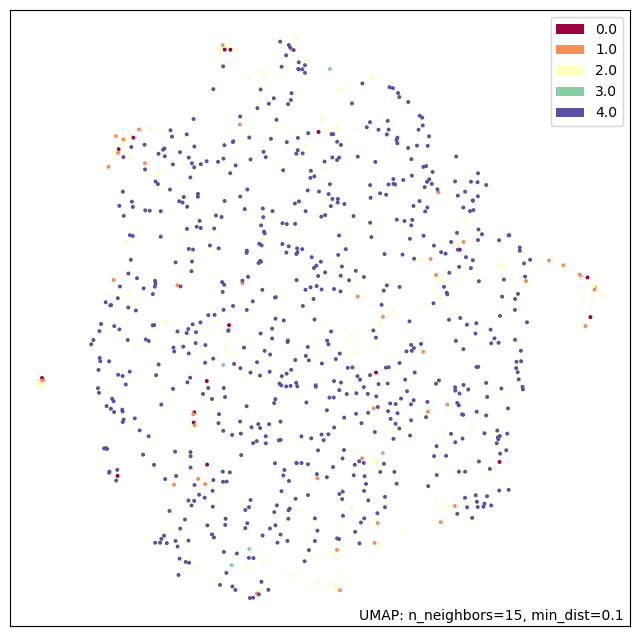

In [20]:
umap.plot.points(mapper, labels=Label)

## 3.1 KNN to transfer labels

In [21]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(alpha_best,DigitClass)

KNeighborsClassifier(n_neighbors=1)

In [22]:
y_pred = np.zeros(len(ANMergeSampleID))
y_pred = -1+y_pred

for i in range(len(ANMergeSampleID)):
    y_pred[i] = neigh.predict([beta_best[i,:]])

In [23]:
y_true

array([1., 2., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 2., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 2.,
       0., 0., 0., 1., 0., 0., 0., 1., 2., 1., 0., 0., 0., 1., 1., 2., 1.,
       0., 0., 0., 0., 1., 0., 1., 2., 0., 1., 0., 2., 0., 2., 0., 0., 0.,
       0., 0., 2., 1., 0., 0., 0., 2., 0., 0., 0., 2., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 2., 1., 0., 2., 0., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 0., 2., 2., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2.

## 3.2 Evaulation

In [24]:
#Mapping = {'Control': 0, 'Typical.AD': 1, 'Asym.AD': 2, 'LowNFT.AD': 3}
#Mapping = {'CTL': 0, 'AD': 1, 'MCI': 2}


pred_ind_cn = np.where(y_pred==0)[0]
true_ind_cn = np.where(y_true==0)[0]
overlap = list(set(pred_ind_cn) & set(true_ind_cn))

pred_ind_aad = np.where(y_pred==2)[0]
true_ind_aad = np.where(y_true==2)[0]
overlap = list(set(pred_ind_aad) & set(true_ind_aad))

pred_ind_tad = np.where(y_pred==1)[0]
true_ind_tad = np.where(y_true==1)[0]
true_ind_tad_aad = list(true_ind_aad) + list(true_ind_tad)
overlap = list(set(pred_ind_tad) & set(true_ind_tad_aad))
print("precision of TAD is ", len(overlap)/len(pred_ind_tad))

pred_ind_aad_cn = list(pred_ind_aad) #+ list(pred_ind_cn)
true_ind_aad_cn = list(true_ind_cn) + list(true_ind_aad)
overlap = list(set(pred_ind_aad_cn) & set(true_ind_aad_cn))
print("precision of AAD  is ", len(overlap)/len(pred_ind_aad_cn))

pred_ind_aad_cn = list(pred_ind_cn) #list(pred_ind_aad) + 
true_ind_aad_cn = list(true_ind_cn) + list(true_ind_aad)
overlap = list(set(pred_ind_aad_cn) & set(true_ind_aad_cn))
if len(pred_ind_aad_cn) == 0:
    print("precision of CN  is 0")
else:
    print("precision of CN  is ", len(overlap)/len(pred_ind_aad_cn))

pred_ind_lt = np.where(y_pred==3)[0]
true_ind_lt = np.where(y_true==1)[0]
true_ind_lt_aad = list(true_ind_aad) + list(true_ind_lt)
overlap = list(set(pred_ind_lt) & set(true_ind_lt_aad))
if len(pred_ind_lt) == 0:
    print("precision of LowTau is 0")
else:
    print("precision of LowTau is ", len(overlap)/len(pred_ind_lt))


precision of TAD is  0.6275862068965518
precision of AAD  is  0.6738095238095239
precision of CN  is  0.6991150442477876
precision of LowTau is  0.7692307692307693


In [27]:
np.mean([62.8, 67.4, 70.0, 76.9])

69.275

In [26]:
(67.7)/4

16.925